In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn
from scipy.optimize import curve_fit

import re
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

###### Load entire Excel file

In [2]:
df = pd.read_excel('NEW_3D_Battery_Performance_Log.xls', sheet_name=None, header=[0, 1, 2])

###### Specify Excel sheet for dataframe equals to the full Excel file

In [3]:
df['1_Discharge (Cover2)'].head(5)

Paper # 14                   Paper # 31                               \
            set #8                       set #1                       set #2   
  Capacity (mAh/g) Voltage (V) Capacity (mAh/g) Voltage (V) Capacity (mAh/g)   
0         4.965905    3.759844        13.782550    3.223055         4.955569   
1        10.669414    3.660817        24.151907    3.169608        15.194221   
2        16.082465    3.554446        34.211732    3.106782        25.037697   
3        22.581061    3.496632        44.426323    3.063749        34.018971   
4        39.715057    3.384521        54.640914    3.034370        43.646897   

                    Paper # 32                                           \
                        set #1                       set #2               
  Voltage (V) Capacity (mAh/g) Voltage (V) Capacity (mAh/g) Voltage (V)   
0    3.381480         0.357306    1.922179         0.516464    1.856763   
1    3.369484         2.627373    1.695525         0.629378    1.788188   
2    3.310078         1.265333    1.831123         2.452121    1.673004   
3    3.237262         1.719346    1.796435         1.081031    1.752818   
4    3.195075         1.946353    1.773310         1.419771    1.722501   

                                
            set #3              
  Capacity (mAh/g) Voltage (V)  
0         0.480789    1.799430  
1         0.480789    1.770996  
2         0.708262    1.735927  
3         1.163210    1.692518  
4         2.950503    1.578659

###### Specific paper in a sheet

In [4]:
df['1_Discharge (Cover2)']['Paper # 32'].head(5)

set #1                       set #2                       set #3  \
  Capacity (mAh/g) Voltage (V) Capacity (mAh/g) Voltage (V) Capacity (mAh/g)   
0         0.357306    1.922179         0.516464    1.856763         0.480789   
1         2.627373    1.695525         0.629378    1.788188         0.480789   
2         1.265333    1.831123         2.452121    1.673004         0.708262   
3         1.719346    1.796435         1.081031    1.752818         1.163210   
4         1.946353    1.773310         1.419771    1.722501         2.950503   

               
  Voltage (V)  
0    1.799430  
1    1.770996  
2    1.735927  
3    1.692518  
4    1.578659

###### Specific set in a paper in a sheet

In [5]:
df['1_Discharge (Cover2)']['Paper # 32']['set #2'].head(7)

,Capacity (mAh/g),Voltage (V)
0,0.516464,1.856763
1,0.629378,1.788188
2,2.452121,1.673004
3,1.081031,1.752818
4,1.419771,1.722501
5,3.000557,1.645986
6,5.409374,1.600591


In [6]:
df['1_Discharge (Cover2)']['Paper # 32'].head(5)

set #1                       set #2                       set #3  \
  Capacity (mAh/g) Voltage (V) Capacity (mAh/g) Voltage (V) Capacity (mAh/g)   
0         0.357306    1.922179         0.516464    1.856763         0.480789   
1         2.627373    1.695525         0.629378    1.788188         0.480789   
2         1.265333    1.831123         2.452121    1.673004         0.708262   
3         1.719346    1.796435         1.081031    1.752818         1.163210   
4         1.946353    1.773310         1.419771    1.722501         2.950503   

               
  Voltage (V)  
0    1.799430  
1    1.770996  
2    1.735927  
3    1.692518  
4    1.578659

###### Load the dataframe from a specific sheet seems to work better (for now)

In [7]:
df = pd.read_excel('NEW_3D_Battery_Performance_Log.xls', sheet_name= '3_CapacityRate', header=[0, 1, 2])

In [8]:
df

Paper # 1                                              Paper #4  \
   set #1 E                   set #1 M                   set #1 E   
     C rate Capacity (mAh/g)    C rate Capacity (mAh/g)    C rate   
0  0.026661       110.350768  0.287220        92.322541  0.048147   
1  0.147635        99.595634  0.566392        82.739099  0.121655   
2  0.279776        96.285964  0.836257        72.391035       NaN   
3  0.566392        85.000231  1.406232        52.891525       NaN   
4  0.838584        75.122293  2.810928        26.834216       NaN   
5  1.405767        57.791812  0.143316        94.650861       NaN   
6  2.810928        25.013564  0.035829       110.240547       NaN   

                                                                          \
                    set #2 E                   set #3 E                    
  Capacity (mAh/g)    C rate Capacity (mAh/g)    C rate Capacity (mAh/g)   
0         0.355790  0.059551         0.363598  0.096021         0.364299   
1         0.170715  0.162193         0.128205       NaN              NaN   
2              NaN       NaN              NaN       NaN              NaN   
3              NaN       NaN              NaN       NaN              NaN   
4              NaN       NaN              NaN       NaN              NaN   
5              NaN       NaN              NaN       NaN              NaN   
6              NaN       NaN              NaN       NaN              NaN   

  Paper #11                                                        \
   Set #1 M                   Set #2 M                   Set #3 M   
     C rate Capacity (mAh/g)    C rate Capacity (mAh/g)    C rate   
0  0.498656       151.746032  0.498656       151.746032  0.498656   
1  0.998656       145.396825  0.998656       145.396825  0.998656   
2  1.993280       134.285714  1.995968       136.825397  1.995968   
3       NaN              NaN       NaN              NaN       NaN   
4       NaN              NaN       NaN              NaN       NaN   
5       NaN              NaN       NaN              NaN       NaN   
6       NaN              NaN       NaN              NaN       NaN   

                                                                          \
                    Set #4 M                   Set #5 M                    
  Capacity (mAh/g)    C rate Capacity (mAh/g)    C rate Capacity (mAh/g)   
0       151.746032  0.498656       151.746032  0.498656       151.746032   
1       144.444444  0.998656       144.444444  0.998656       145.396825   
2         5.714286  1.995968         7.936508  1.998656       130.158730   
3              NaN       NaN              NaN       NaN              NaN   
4              NaN       NaN              NaN       NaN              NaN   
5              NaN       NaN              NaN       NaN              NaN   
6              NaN       NaN              NaN       NaN              NaN   

                             Paper #17                             \
   Set #6 M                   set #1 E                   set #2 E   
     C rate Capacity (mAh/g)    C rate Capacity (mAh/g)    C rate   
0  0.498656       151.746032  1.985336        18.301887  2.001908   
1  0.998656       144.444444  0.987609        62.075472  0.987609   
2  1.995968        14.285714  0.495388       125.849057  0.491288   
3       NaN              NaN  0.324213       142.830189  0.326919   
4       NaN              NaN  0.198534       149.622642  0.198534   
5       NaN              NaN  0.098761       153.018868  0.099585   
6       NaN              NaN  0.066821       153.396226  0.066267   

                                              Paper #19                   \
                    set #3 E                   set #1 E                    
  Capacity (mAh/g)    C rate Capacity (mAh/g)    C rate Capacity (mAh/g)   
0        50.377358  0.196987       151.370093  4.907139       144.082902   
1       116.415094  1.968901       107.735849  2.964104       146.735751   
2       143.962264  0.98760

In [9]:
df.columns[0]

('Paper # 1', 'set #1 E', 'C rate')

#REFERENCES FOR MULTI-INDEXING

https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html

https://stackoverflow.com/questions/40554106/read-excel-sheet-with-multiple-header-using-pandas

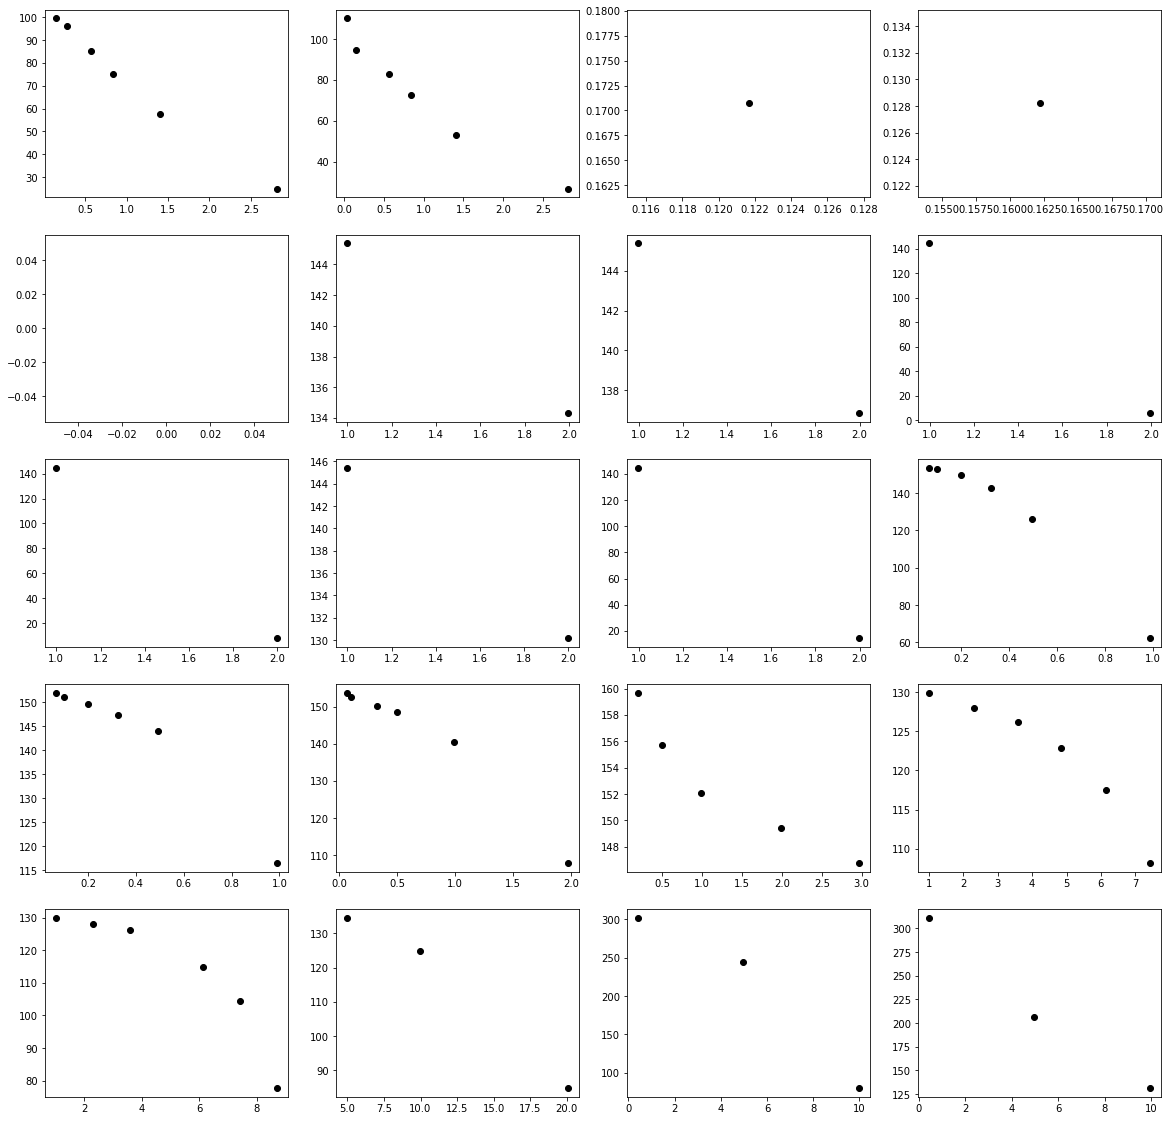

In [10]:
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(20,20))
#ax = fig.subplots(nrows=5,ncols=4)
#jet= plt.get_cmap('jet')
#colors = iter(jet(np.linspace(0,1,20)))

for i in range(int(len(df.columns)/2)):
    ax = plt.subplot(5, 4, i+1)
    ax.plot(df.iloc[:,2*i].values[1:],df.iloc[:,2*i+1].values[1:],color='k',marker='o', linewidth=0)
    #ax.set_xlim([0,40])
    #ax.set_ylim([0,200])
    #ax.set_xscale('log')
    #ax.set_yscale('log')

#### Define the Euqation to be fitted

In [11]:
def objective(R,t,n,Q):
    return Q*(1-( (R*t) ** n ) * (1 - np.exp(- ((R*t) ** (-n)) )) )

In [12]:
def par_std(t, n, Q, covariance):
    # summarize the parameter and standard deviation
    std = np.sqrt(np.diag(covariance))
    print('t = ' + f'{t:.3f}' + u'\u00B1' + f'{std[0]:.3f}')
    print('n = ' + f'{n:.3f}' + u'\u00B1' + f'{std[1]:.3f}')
    print('Q = ' + f'{Q:.3f}' + u'\u00B1' + f'{std[2]:.3f}')
    return

In [13]:
def plot_fit(R,y,t,n,Q):
    # plot data as scattered points
    plt.scatter(R, y)
    # define a sequence of x-axis point based on the limits of the data
    R_line = np.arange(0.5*min(R), 1.5*max(R), 0.01)
    # calculate y with the fitted equation
    y_line = objective(R_line, t, n, Q)
    # plot equation
    plt.plot(R_line, y_line, '--', color='red')
    return

<ipython-input-11-26a65b54c072>:2: RuntimeWarning: invalid value encountered in power
  return Q*(1-( (R*t) ** n ) * (1 - np.exp(- ((R*t) ** (-n)) )) )
<ipython-input-11-26a65b54c072>:2: RuntimeWarning: invalid value encountered in power
  return Q*(1-( (R*t) ** n ) * (1 - np.exp(- ((R*t) ** (-n)) )) )
<ipython-input-11-26a65b54c072>:2: RuntimeWarning: invalid value encountered in power
  return Q*(1-( (R*t) ** n ) * (1 - np.exp(- ((R*t) ** (-n)) )) )
<ipython-input-11-26a65b54c072>:2: RuntimeWarning: invalid value encountered in power
  return Q*(1-( (R*t) ** n ) * (1 - np.exp(- ((R*t) ** (-n)) )) )
<ipython-input-11-26a65b54c072>:2: RuntimeWarning: invalid value encountered in power
  return Q*(1-( (R*t) ** n ) * (1 - np.exp(- ((R*t) ** (-n)) )) )
<ipython-input-11-26a65b54c072>:2: RuntimeWarning: invalid value encountered in power
  return Q*(1-( (R*t) ** n ) * (1 - np.exp(- ((R*t) ** (-n)) )) )
<ipython-input-11-26a65b54c072>:2: RuntimeWarning: invalid value encountered in power
  

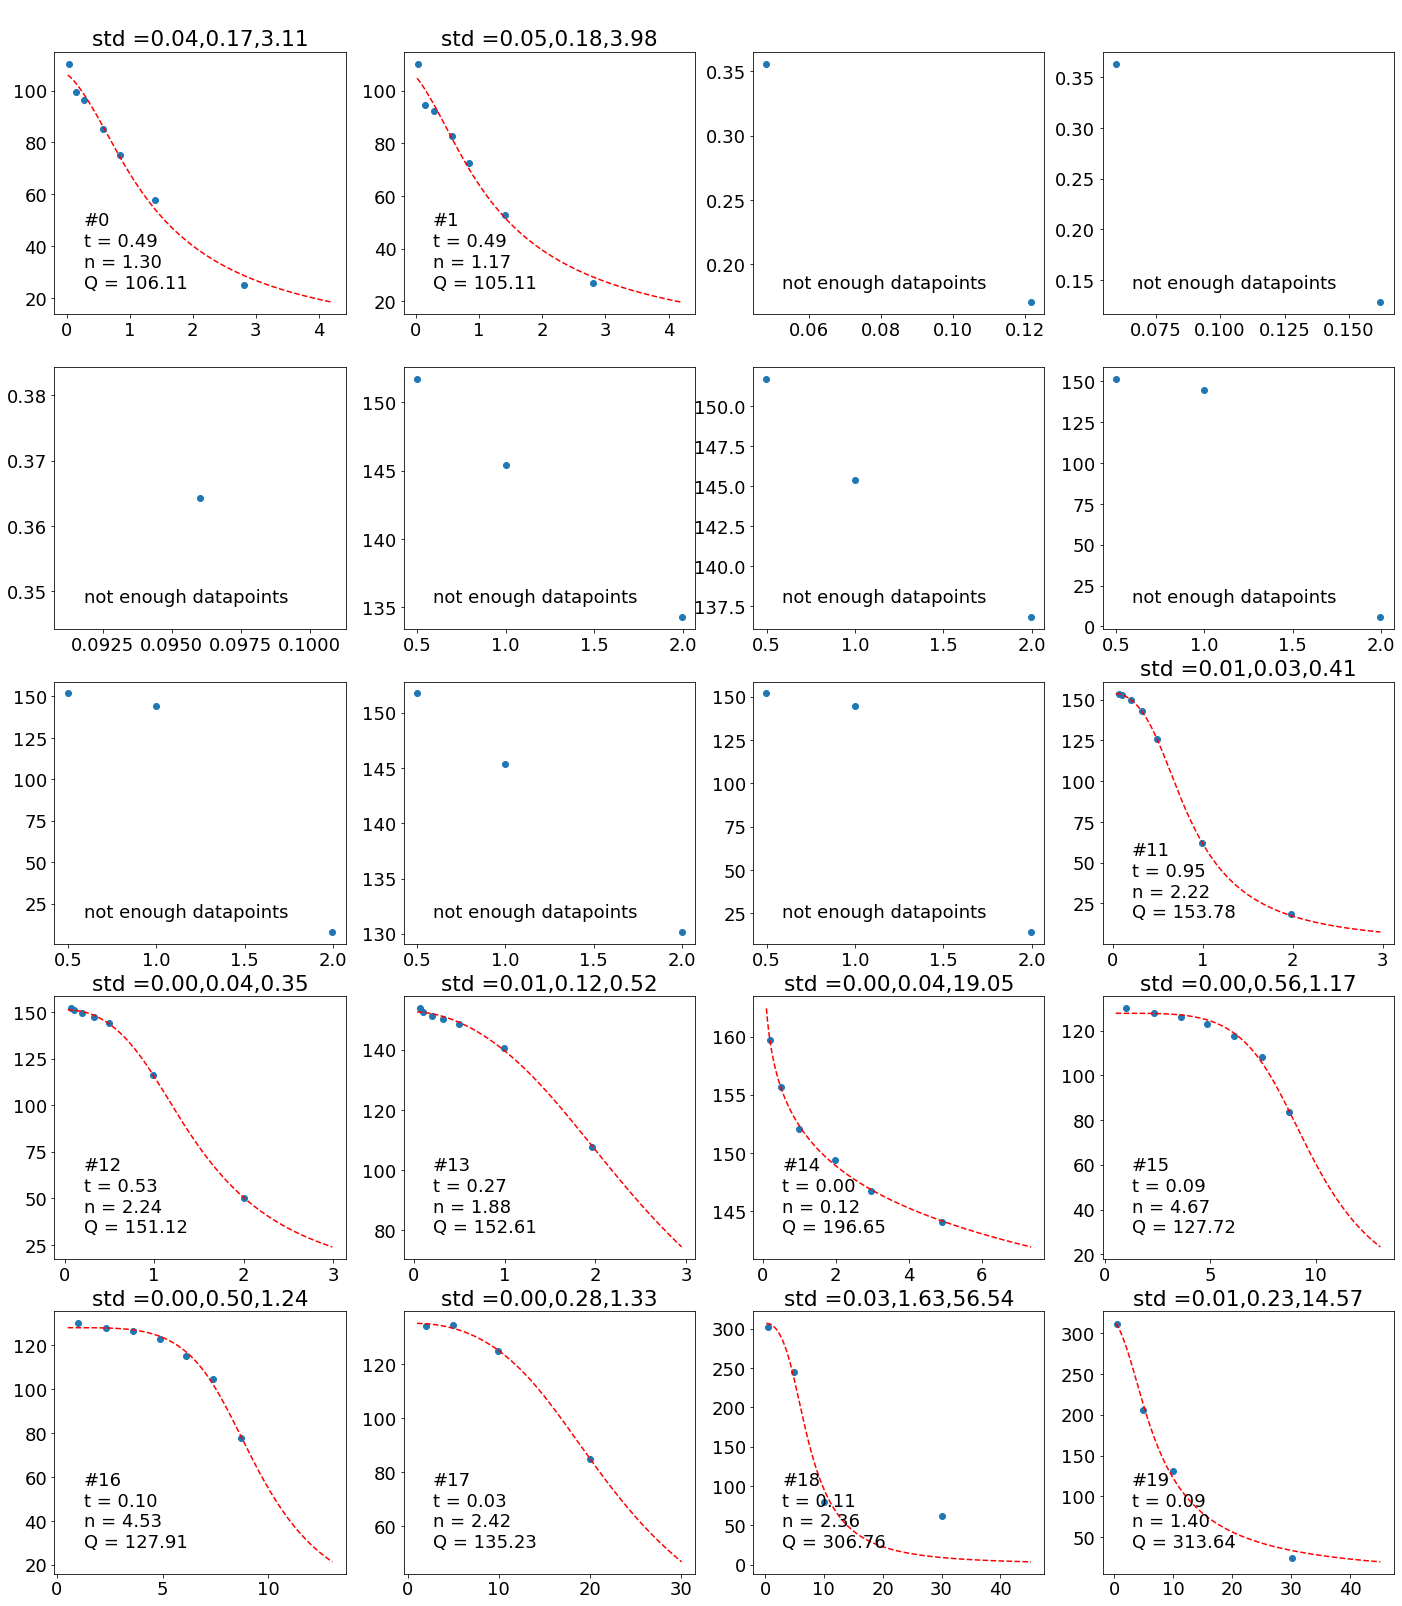

In [14]:
matplotlib.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(24,28))
#ax = fig.subplots(nrows=5,ncols=4)
list_of_t = []
list_of_n = []
list_of_Q = []
list_of_col = []
for i in range(int(len(df.columns)/2)):
    # choose the input and output variables
    R = df.iloc[:,2*i].values[0:]
    R = R[~pd.isnull(R)]
    y = df.iloc[:,2*i+1].values[0:]
    y = y[~pd.isnull(y)]
    if len(R)>=4:
        par, cov = curve_fit(objective, R, y, p0=[100,0.5,100])#, bounds=([-np.inf, 0, 0],[np.inf, 10, 500]))
        t,n,Q = par
        #print("\n\n")
        #par_std(t, n, Q, cov)
        std = np.sqrt(np.diag(cov))
        labs = '#'+str(i)+'\nt = ' + f'{t:.2f}' +'\nn = ' + f'{n:.2f}' + '\nQ = ' + f'{Q:.2f}'
        ax = plt.subplot(5, 4, i+1, title= '\nstd =' + f'{std[0]:.2f}'+ ','+ f'{std[1]:.2f}'+ ',' + f'{std[2]:.2f}')
        plt.text(0.1, 0.1, labs, transform=ax.transAxes)
        #ax.legend(lab,fontsize=18)
        ax = plot_fit(R, y, t, n, Q)
    else:
        t = 0
        n = 0
        Q = 0
        ax = plt.subplot(5, 4, i+1)
        plt.text(0.1, 0.1, 'not enough datapoints', transform=ax.transAxes)
        ax = plt.scatter(R,y)
    
    list_of_t.append(t)
    list_of_n.append(n)
    list_of_Q.append(Q)

### We can single out specific column that does not fit well with the general setting
We can set the initial point ***p0*** and parameter bounds ***bounds*** to cutomize the optimization alg.

[inf inf inf]


<ipython-input-11-26a65b54c072>:2: RuntimeWarning: invalid value encountered in power
  return Q*(1-( (R*t) ** n ) * (1 - np.exp(- ((R*t) ** (-n)) )) )
/home/daniu/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


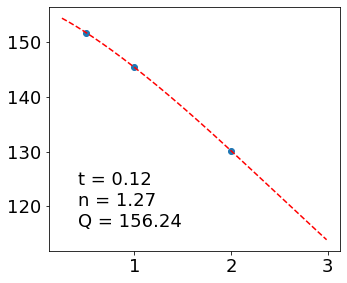

In [15]:
matplotlib.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(24,26))

# Specify case/dataset number and locate the R and y values
i=9
R = df.iloc[:,2*i].values[0:]
R = R[~pd.isnull(R)]
y = df.iloc[:,2*i+1].values[0:]
y = y[~pd.isnull(y)]

par, cov = curve_fit(objective, R, y, p0=[100,0.4,100])#, bounds=([-1, 0, 0],[np.inf, 10, 500]))
t,n,Q = par
std = np.sqrt(np.diag(cov))
labs = 't = ' + f'{t:.2f}' +'\nn = ' + f'{n:.2f}'+'\nQ = ' + f'{Q:.2f}'
ax = plt.subplot(5, 4, i+1)
plt.text(0.1, 0.1, labs, transform=ax.transAxes)
ax = plot_fit(R, y, t, n, Q)
print(std)

# Update the output fitting parameter
#list_of_t[9] = t
#list_of_n[9] = n
#list_of_Q[9] = Q


### Plot histograms to show distributions of n and tau
Figure 2(f) in Tian's paper

Text(0, 0.5, 'number of cases')

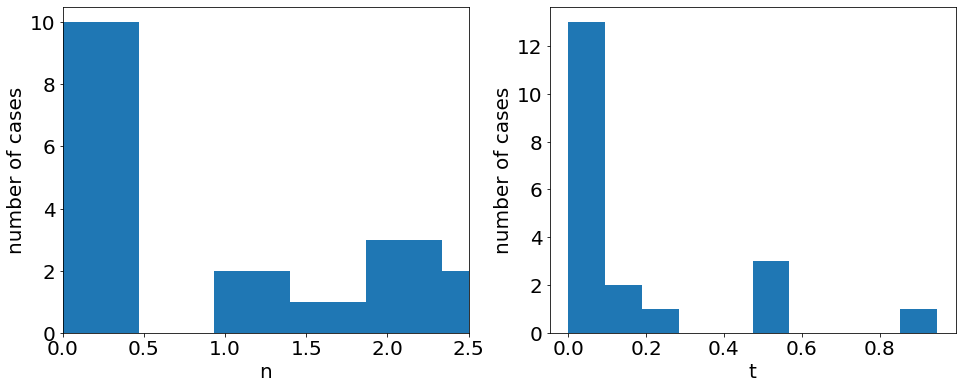

In [16]:
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(16,6))
ax = fig.subplots(nrows=1,ncols=2)

ax[0].hist(list_of_n)
ax[0].set_xlabel('n')
ax[0].set_xlim(0,2.5)
ax[0].set_ylabel('number of cases')
ax[1].hist(list_of_t)
ax[1].set_xlabel('t')
ax[1].set_ylabel('number of cases')

### Place all Curve fitting parameters into a dataframe

In [17]:
# Put all column names into a list
col_name = list(df.columns)[1::2]
# Turn the tuples into lists
for index,element in enumerate(col_name):
    col_name[index] = list(element[:-1])
    for sub_index,string in enumerate(col_name[index]):
        # conserve numbers only
        col_name[index][sub_index] = int(re.findall(r'\d+', string)[0])
    col_name[index] = tuple(col_name[index])
#col_name



### Place all fitting parameters into a dataframe following the format of the Parameter sheets

In [18]:
par_df = pd.DataFrame(columns=['Paper #','Set','n','tau','Q'])
par_df
# Input paper and set numbers
for index,element in enumerate(col_name):
    row = [int(element[0]), int(element[1]), list_of_n[index], list_of_t[index], list_of_Q[index]]
    row_series = pd.Series(row, index=par_df.columns)
    par_df = par_df.append(row_series, ignore_index=True)
par_df

,Paper #,Set,n,tau,Q
0,1.0,1.0,1.302510,0.485641,106.109051
1,1.0,1.0,1.171664,0.487356,105.112499
2,4.0,1.0,0.000000,0.000000,0.000000
3,4.0,2.0,0.000000,0.000000,0.000000
4,4.0,3.0,0.000000,0.000000,0.000000
5,11.0,1.0,0.000000,0.000000,0.000000
6,11.0,2.0,0.000000,0.000000,0.000000
7,11.0,3.0,0.000000,0.000000,0.000000
8,11.0,4.0,0.000000,0.000000,0.000000
9,11.0,5.0,0.000000,0.000000,0.000000


#### A different way to structure the fitting parameter dataframe

In [19]:
# Column names signify (Paper#, Set#)
par_df2 = pd.DataFrame(columns=col_name)
par_df2
# Append n values
row_n = pd.Series(list_of_n, index=par_df2.columns, name='n')
par_df2 =par_df2.append(row_n,ignore_index=False)
# Append tau values
row_t = pd.Series(list_of_t, index=par_df2.columns, name='tau')
par_df2 =par_df2.append(row_t,ignore_index=False)
# Append Q values
row_Q = pd.Series(list_of_Q, index=par_df2.columns, name='Q')
par_df2 =par_df2.append(row_Q,ignore_index=False)

par_df2

,"(1, 1)","(1, 1)","(4, 1)","(4, 2)","(4, 3)","(11, 1)","(11, 2)","(11, 3)","(11, 4)","(11, 5)","(11, 6)","(17, 1)","(17, 2)","(17, 3)","(19, 1)","(23, 1)","(23, 2)","(27, 1)","(31, 1)","(31, 2)"
n,1.302510,1.171664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.223919,2.244143,1.884653,0.115141,4.669976,4.526725,2.421715,2.363981,1.402870
tau,0.485641,0.487356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.947268,0.529848,0.270364,0.000003,0.092302,0.095259,0.034467,0.109881,0.094515
Q,106.109051,105.112499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153.778365,151.124828,152.606465,196.646059,127.716693,127.906362,135.232037,306.757639,313.641256


# This is the end of Curve fitting and the Beginning of Visualization

### Load Geometry and Material Parameters

In [20]:
geo_df= pd.read_excel('NEW_3D_Battery_Parameter_Log.xls', sheet_name='GeometryParameters')

In [21]:
geo_df.head(7)

,Paper #,DOI,Set,Full Cell \nThickness [µm],Cathode \nThickness [µm],Anode \nThickness [µm],Separator \nThickness [µm],Cathode 3D \nCharateristic Length [µm],Cathode 3D \nCharateristic Note,Anode 3D \nCharateristic\nLength [µm],Anode 3D \nCharateristic Note,SA/V [1/µm],SA gain
0,1,https://doi.org/10.1021/acsaem.0c01029,1,NaN,500,N/R,N/R,100,Circular Column Diameter,NaN,NaN,0.0296,14.8
1,2,https://doi.org/10.1016/j.addma.2018.07.006,1,NaN,N/R,215,N/R,N/R,N/R,NaN,Microlattice,NaN,NaN
2,2,https://doi.org/10.1016/j.addma.2018.07.006,2,NaN,N/R,415,N/R,N/R,N/R,NaN,Microlattice,NaN,NaN
3,2,https://doi.org/10.1016/j.addma.2018.07.006,3,NaN,N/R,265,N/R,N/R,N/R,NaN,Microlattice,NaN,NaN
4,2,https://doi.org/10.1016/j.addma.2018.07.006,4,NaN,N/R,473,N/R,N/R,N/R,NaN,Microlattice,NaN,NaN
5,2,http://www.sciencedirect.com/science/article/p...,5,NaN,N/R,457,N/R,N/R,N/R,NaN,Block,NaN,NaN
6,2,http://www.sciencedirect.com/science/article/p...,6,NaN,N/R,460,N/R,N/R,N/R,NaN,Block,NaN,NaN


In [22]:
thickness_df = geo_df[['Paper #','Set','Cathode \nThickness [µm]','Anode \nThickness [µm] ', 'Cathode 3D \nCharateristic Length [µm]','Anode 3D \nCharateristic\nLength [µm]','SA/V [1/µm]','SA gain']]
thickness_df.head(7)

,Paper #,Set,Cathode \nThickness [µm],Anode \nThickness [µm],Cathode 3D \nCharateristic Length [µm],Anode 3D \nCharateristic\nLength [µm],SA/V [1/µm],SA gain
0,1,1,500,N/R,100,NaN,0.0296,14.8
1,2,1,N/R,215,N/R,NaN,NaN,NaN
2,2,2,N/R,415,N/R,NaN,NaN,NaN
3,2,3,N/R,265,N/R,NaN,NaN,NaN
4,2,4,N/R,473,N/R,NaN,NaN,NaN
5,2,5,N/R,457,N/R,NaN,NaN,NaN
6,2,6,N/R,460,N/R,NaN,NaN,NaN


### New dataframe with all parameters

In [23]:
# Extract rows wth the correct paper and set #
cols = ['Paper #','Set','Cathode \nThickness [µm]','Anode \nThickness [µm] ','Cathode 3D \nCharateristic Length [µm]','Anode 3D \nCharateristic\nLength [µm]','n','tau','Q']
par_df_full = pd.DataFrame(columns=cols)
for index, row in par_df.iterrows():
    select_rows = thickness_df.loc[(thickness_df['Set']==row['Set']) & (thickness_df['Paper #']==row['Paper #'])]
    par_df_full = par_df_full.append(select_rows,ignore_index=True)


    
# Append fitting parameter values to dataframe
par_df_full['n'] = par_df['n']
par_df_full['tau'] = par_df['tau']
par_df_full['Q'] = par_df['Q']

par_df_full

,Paper #,Set,Cathode \nThickness [µm],Anode \nThickness [µm],Cathode 3D \nCharateristic Length [µm],Anode 3D \nCharateristic\nLength [µm],n,tau,Q,SA/V [1/µm],SA gain
0,1,1,500,N/R,100,NaN,1.302510,0.485641,106.109051,0.0296,14.80
1,1,1,500,N/R,100,NaN,1.171664,0.487356,105.112499,0.0296,14.80
2,4,1,550,N/R,100,N/R,0.000000,0.000000,0.000000,NaN,NaN
3,4,2,350,N/R,100,N/R,0.000000,0.000000,0.000000,NaN,NaN
4,4,3,350,N/R,50,N/R,0.000000,0.000000,0.000000,NaN,NaN
5,11,1,60,N/R,2500,N/R,0.000000,0.000000,0.000000,NaN,NaN
6,11,2,120,N/R,N/R,N/R,0.000000,0.000000,0.000000,NaN,NaN
7,11,3,170,N/R,N/R,N/R,0.000000,0.000000,0.000000,NaN,NaN
8,11,4,120,N/R,N/R,N/R,0.000000,0.000000,0.000000,NaN,NaN
9,11,5,120,N/R,50,N/R,0.000000,0.000000,0.000000,NaN,NaN


Rule out rows with zero fitting parameters

In [24]:
par_df_full = par_df_full.loc[par_df_full['n'] > 0]
par_df_full

,Paper #,Set,Cathode \nThickness [µm],Anode \nThickness [µm],Cathode 3D \nCharateristic Length [µm],Anode 3D \nCharateristic\nLength [µm],n,tau,Q,SA/V [1/µm],SA gain
0,1,1,500,N/R,100,NaN,1.302510,0.485641,106.109051,0.0296,14.80
1,1,1,500,N/R,100,NaN,1.171664,0.487356,105.112499,0.0296,14.80
11,17,1,220,N/R,2000,N/R,2.223919,0.947268,153.778365,0.0051,1.10
12,17,2,220,N/R,180,N/R,2.244143,0.529848,151.124828,0.0102,2.30
13,17,3,220,N/R,17,N/R,1.884653,0.270364,152.606465,0.0694,15.30
14,19,1,150,N/R,70,70,0.115141,0.000003,196.646059,0.0200,3.00
15,23,1,69,70,N/R,60,4.669976,0.092302,127.716693,0.0267,1.90
16,23,2,69,70,N/R,60,4.526725,0.095259,127.906362,0.0267,1.90
17,27,1,15,15,15,15,2.421715,0.034467,135.232037,0.0222,11.42
18,31,1,6,N/R,0.5,N/R,2.363981,0.109881,306.757639,3.0100,18.10


Make all ***N/R*** Nans

In [25]:
par_df_full = par_df_full.replace(['N/R'], np.NaN)
par_df_full

,Paper #,Set,Cathode \nThickness [µm],Anode \nThickness [µm],Cathode 3D \nCharateristic Length [µm],Anode 3D \nCharateristic\nLength [µm],n,tau,Q,SA/V [1/µm],SA gain
0,1,1,500,NaN,100.0,NaN,1.302510,0.485641,106.109051,0.0296,14.80
1,1,1,500,NaN,100.0,NaN,1.171664,0.487356,105.112499,0.0296,14.80
11,17,1,220,NaN,2000.0,NaN,2.223919,0.947268,153.778365,0.0051,1.10
12,17,2,220,NaN,180.0,NaN,2.244143,0.529848,151.124828,0.0102,2.30
13,17,3,220,NaN,17.0,NaN,1.884653,0.270364,152.606465,0.0694,15.30
14,19,1,150,NaN,70.0,70.0,0.115141,0.000003,196.646059,0.0200,3.00
15,23,1,69,70.0,NaN,60.0,4.669976,0.092302,127.716693,0.0267,1.90
16,23,2,69,70.0,NaN,60.0,4.526725,0.095259,127.906362,0.0267,1.90
17,27,1,15,15.0,15.0,15.0,2.421715,0.034467,135.232037,0.0222,11.42
18,31,1,6,NaN,0.5,NaN,2.363981,0.109881,306.757639,3.0100,18.10


### Include information on Architecture types

In [26]:
# Select columns of interest
general_df = pd.read_excel('NEW_3D_Battery_Parameter_Log.xls', sheet_name='GeneralInformation')
arctype_df = general_df[['Paper #','Set','General Overall Architecture','General Cathode Architecture','General Anode Architecture','1C current Density [mA/cm^2]']]
arctype_df

# Select rows of interest
arctype_df_needed = pd.DataFrame(columns=arctype_df.columns)
for index, row in par_df.iterrows():
    select_rows = arctype_df.loc[(arctype_df['Set']==row['Set']) & (arctype_df['Paper #']==row['Paper #'])]
    arctype_df_needed = arctype_df_needed.append(select_rows,ignore_index=True)

arctype_df_needed

par_df_full['General Overall Architecture'] = arctype_df_needed['General Overall Architecture']
par_df_full['General Cathode Architecture'] = arctype_df_needed['General Cathode Architecture']
par_df_full['General Anode Architecture'] = arctype_df_needed['General Anode Architecture']
par_df_full['1C current Density [mA/cm^2]'] = arctype_df_needed['1C current Density [mA/cm^2]']
par_df_full

,Paper #,Set,Cathode \nThickness [µm],Anode \nThickness [µm],Cathode 3D \nCharateristic Length [µm],Anode 3D \nCharateristic\nLength [µm],n,tau,Q,SA/V [1/µm],SA gain,General Overall Architecture,General Cathode Architecture,General Anode Architecture,1C current Density [mA/cm^2]
0,1,1,500,NaN,100.0,NaN,1.302510,0.485641,106.109051,0.0296,14.80,2.5D,Solid Column,1D,1.780
1,1,1,500,NaN,100.0,NaN,1.171664,0.487356,105.112499,0.0296,14.80,2.5D,Solid Column,1D,1.780
11,17,1,220,NaN,2000.0,NaN,2.223919,0.947268,153.778365,0.0051,1.10,2.5D,Electrolyte channel,1D,NaN
12,17,2,220,NaN,180.0,NaN,2.244143,0.529848,151.124828,0.0102,2.30,2.5D,Electrolyte channel,1D,NaN
13,17,3,220,NaN,17.0,NaN,1.884653,0.270364,152.606465,0.0694,15.30,2.5D,Electrolyte channel,1D,NaN
14,19,1,150,NaN,70.0,70.0,0.115141,0.000003,196.646059,0.0200,3.00,2.5D,1D,Electrolyte channel,N/R
15,23,1,69,70.0,NaN,60.0,4.669976,0.092302,127.716693,0.0267,1.90,2.5D,1D,Electrolyte channel,N/R
16,23,2,69,70.0,NaN,60.0,4.526725,0.095259,127.906362,0.0267,1.90,2.5D,1D,Electrolyte channel,N/R
17,27,1,15,15.0,15.0,15.0,2.421715,0.034467,135.232037,0.0222,11.42,Interdigitated,Int plate,Int plate,0.135
18,31,1,6,NaN,0.5,NaN,2.363981,0.109881,306.757639,3.0100,18.10,2.5D,Coated Network,1D,N/R


### Include Material Information

In [27]:
mat_df= pd.read_excel('NEW_3D_Battery_Parameter_Log.xls', sheet_name='MaterialParameters')
mat_df

,Paper #,DOI,Person,Set,Cathode Material,Anode Material,Electrolyte Material,Cathode \nParticle Max. \nDiameter [µm],Cathode \nParticle Ave.\nDiameter [µm],Cathode \nParticle Min. \nDiameter [µm],Anode \nParticle Max. \nDiameter [µm],Anode \nParticle Ave. \nDiameter [µm],Anode \nParticle Min. \nDiameter [µm],Cathode \nElectric \nConductivity [S/cm],Anode \nElectric \nConductivity [S/cm],Electrolyte \nElectric \nConductivity [S/cm],Cathode \nDiffusivity \n[cm^2/s],Anode \nDiffusivity \n[cm^2/s],Electrolyte \nDiffusivity \n[cm^2/s]
0,1,https://doi.org/10.1021/acsaem.0c01029,Doris,1,LiFePO4,Lithium,Ionogel,N/R,NaN,NaN,N/R,NaN,NaN,0.05,N/R,0.002,N/R,N/R,N/R
1,2,https://doi.org/10.1016/j.addma.2018.07.006,Phong,1,Lithium foil,Silver,1M LiPF6 in EC:PC:EMC 1:1:3,N/R,N/R,N/R,0.03,N/R,0.05,N/R,N/R,N/R,N/R,N/R,N/R
2,2,https://doi.org/10.1016/j.addma.2018.07.006,Phong,2,Lithium foil,Silver,1M LiPF6 in EC:PC:EMC 1:1:3,N/R,N/R,N/R,0.03,N/R,0.05,N/R,N/R,N/R,N/R,N/R,N/R
3,2,https://doi.org/10.1016/j.addma.2018.07.006,Phong,3,Lithium foil,Silver,1M LiPF6 in EC:PC:EMC 1:1:3,N/R,N/R,N/R,0.03,N/R,0.05,N/R,N/R,N/R,N/R,N/R,N/R
4,2,https://doi.org/10.1016/j.addma.2018.07.006,Phong,4,Lithium foil,Silver,1M LiPF6 in EC:PC:EMC 1:1:3,N/R,N/R,N/R,0.03,N/R,0.05,N/R,N/R,N/R,N/R,N/R,N/R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,35,https://doi.org/10.1038/ncomms2747,Katrina,8,LiMnO2 on porous Ni,NiSn on porous Ni,1M LiClO4 EC : DEC in 1:1 wt ratio,N/R,N/R,N/R,N/R,N/R,N/R,N/R,N/R,N/R,2.2*10^-13,N/R,N/R
86,37,https://doi.org/10.1073/pnas.1423889112,Katrina,1,LMO,NiSn on porous Ni,1M LiClO4 EC : DEC in 1:1 wt ratio,N/R,100,N/R,N/R,70,N/R,1.4*10^7,1.4*10^7,N/R,1.1*10^-12,8.5*10^-13,2.6*10^-6
87,37,https://doi.org/10.1073/pnas.1423889112,Katrina,2,LMO,NiSn on porous Ni,1M LiClO4 EC : DEC in 1:1 wt ratio,N/R,100,N/R,N/R,70,N/R,1.4*10^7,1.4*10^7,N/R,1.1*10^-12,8.5*10^-13,2.6*10^-6
88,37,https://doi.org/10.1073/pnas.1423889112,Katrina,3,LMO,NiSn on porous Ni,1M LiClO4 EC : DEC in 1:1 wt ratio,N/R,100,N/R,N/R,70,N/R,1.4*10^7,1.4*10^7,N/R,1.1*10^-12,8.5*10^-13,2.6*10^-6


In [28]:
mat_df = mat_df[['Paper #','Set','Cathode Material','Anode Material']]
# Select rows of interest
mat_df_needed = pd.DataFrame(columns=mat_df.columns)
for index, row in par_df.iterrows():
    select_rows = mat_df.loc[(mat_df['Set']==row['Set']) & (mat_df['Paper #']==row['Paper #'])]
    mat_df_needed = mat_df_needed.append(select_rows,ignore_index=True)

mat_df_needed

par_df_full['Cathode Material'] = mat_df_needed['Cathode Material']
par_df_full['Anode Material'] = mat_df_needed['Anode Material']
par_df_full

,Paper #,Set,Cathode \nThickness [µm],Anode \nThickness [µm],Cathode 3D \nCharateristic Length [µm],Anode 3D \nCharateristic\nLength [µm],n,tau,Q,SA/V [1/µm],SA gain,General Overall Architecture,General Cathode Architecture,General Anode Architecture,1C current Density [mA/cm^2],Cathode Material,Anode Material
0,1,1,500,NaN,100.0,NaN,1.302510,0.485641,106.109051,0.0296,14.80,2.5D,Solid Column,1D,1.780,LiFePO4,Lithium
1,1,1,500,NaN,100.0,NaN,1.171664,0.487356,105.112499,0.0296,14.80,2.5D,Solid Column,1D,1.780,LiFePO4,Lithium
11,17,1,220,NaN,2000.0,NaN,2.223919,0.947268,153.778365,0.0051,1.10,2.5D,Electrolyte channel,1D,NaN,LiCoO2,Lithium
12,17,2,220,NaN,180.0,NaN,2.244143,0.529848,151.124828,0.0102,2.30,2.5D,Electrolyte channel,1D,NaN,LiCoO2,Lithium
13,17,3,220,NaN,17.0,NaN,1.884653,0.270364,152.606465,0.0694,15.30,2.5D,Electrolyte channel,1D,NaN,LiCoO2,Lithium
14,19,1,150,NaN,70.0,70.0,0.115141,0.000003,196.646059,0.0200,3.00,2.5D,1D,Electrolyte channel,N/R,Li4Ti5O12,Lithium
15,23,1,69,70.0,NaN,60.0,4.669976,0.092302,127.716693,0.0267,1.90,2.5D,1D,Electrolyte channel,N/R,NMC (1/11),Graphite
16,23,2,69,70.0,NaN,60.0,4.526725,0.095259,127.906362,0.0267,1.90,2.5D,1D,Electrolyte channel,N/R,NMC (1/11),Graphite
17,27,1,15,15.0,15.0,15.0,2.421715,0.034467,135.232037,0.0222,11.42,Interdigitated,Int plate,Int plate,0.135,LiCoO2,Li4Ti5O12
18,31,1,6,NaN,0.5,NaN,2.363981,0.109881,306.757639,3.0100,18.10,2.5D,Coated Network,1D,N/R,V2O5,Lithium


In [29]:
par_df_full[['Paper #','Set','Cathode Material','Anode Material']]

,Paper #,Set,Cathode Material,Anode Material
0,1,1,LiFePO4,Lithium
1,1,1,LiFePO4,Lithium
11,17,1,LiCoO2,Lithium
12,17,2,LiCoO2,Lithium
13,17,3,LiCoO2,Lithium
14,19,1,Li4Ti5O12,Lithium
15,23,1,NMC (1/11),Graphite
16,23,2,NMC (1/11),Graphite
17,27,1,LiCoO2,Li4Ti5O12
18,31,1,V2O5,Lithium


### Plot Fitting parameters versus cathode thickness
Figure 2(c) and Figure 2(e) in Tian's paper

[]

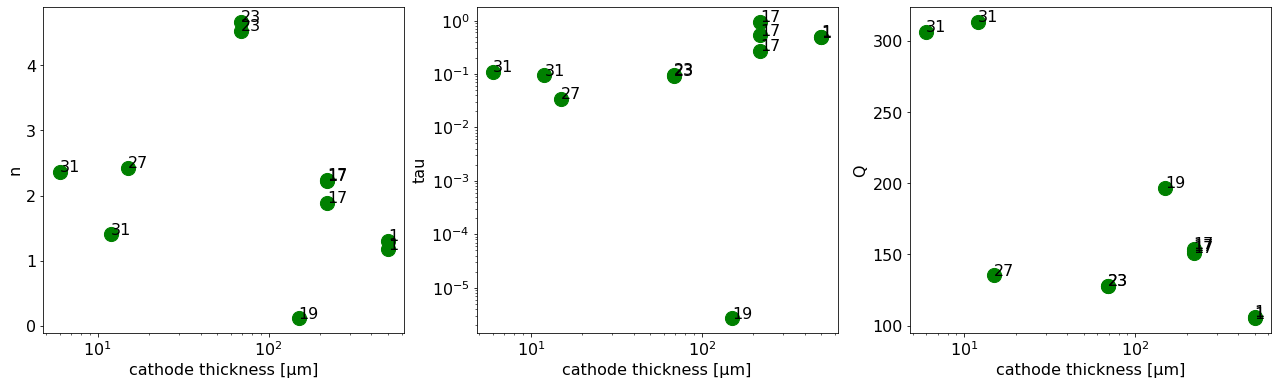

In [35]:
matplotlib.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(22,6))
ax = fig.subplots(nrows=1,ncols=3)

cathode_thickness = par_df_full['Cathode \nThickness [µm]'].values
n = par_df_full['n'].values
tau = par_df_full['tau'].values
Q = par_df_full['Q'].values
paper = par_df_full['Paper #'].values


ax[0].scatter(cathode_thickness, n, color='g',s=200)
ax[0].set_xlabel('cathode thickness [µm]')
ax[0].set_ylabel('n')
for index, txt in enumerate(paper):
    ax[0].annotate(paper[index], (cathode_thickness[index], n[index]))
ax[0].semilogx()
    
ax[1].scatter(cathode_thickness, tau, color='g',s=200)
ax[1].set_xlabel('cathode thickness [µm]')
ax[1].set_ylabel('tau')
for index, txt in enumerate(paper):
    ax[1].annotate(paper[index], (cathode_thickness[index], tau[index]))
ax[1].loglog()
        
ax[2].scatter(cathode_thickness, Q, color='g',s=200)
ax[2].set_xlabel('cathode thickness [µm]')
ax[2].set_ylabel('Q')
for index, txt in enumerate(paper):
    ax[2].annotate(paper[index], (cathode_thickness[index], Q[index]))
ax[2].semilogx()

#### Plot without log scale

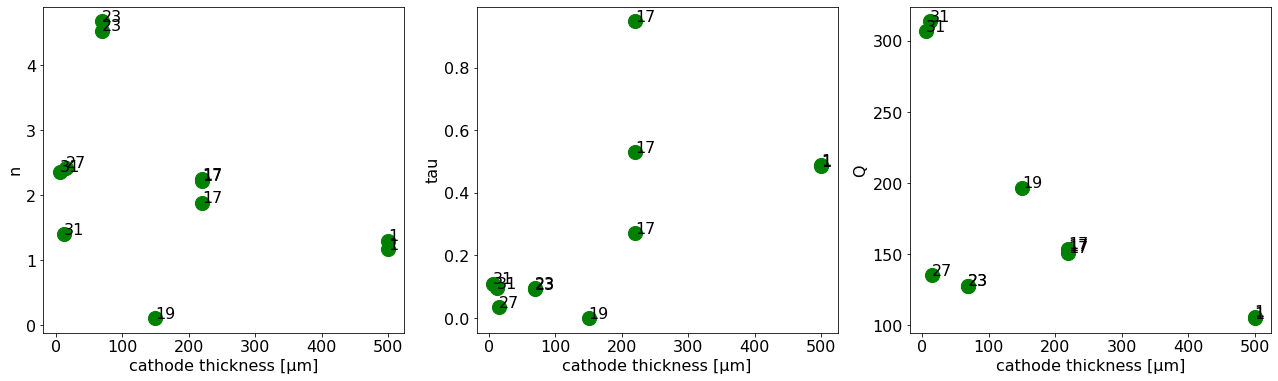

In [36]:
matplotlib.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(22,6))
ax = fig.subplots(nrows=1,ncols=3)

cathode_arc = par_df_full['General Cathode Architecture'].values
anode_arc = par_df_full['General Anode Architecture'].values

ax[0].scatter(cathode_thickness, n, color='g',s=200)
ax[0].set_xlabel('cathode thickness [µm]')
ax[0].set_ylabel('n')
for index, txt in enumerate(paper):
    ax[0].annotate(paper[index], (cathode_thickness[index], n[index]))

    
ax[1].scatter(cathode_thickness, tau, color='g',s=200)
ax[1].set_xlabel('cathode thickness [µm]')
ax[1].set_ylabel('tau')
for index, txt in enumerate(paper):
    ax[1].annotate(paper[index], (cathode_thickness[index], tau[index]))

        
ax[2].scatter(cathode_thickness, Q, color='g',s=200)
ax[2].set_xlabel('cathode thickness [µm]')
ax[2].set_ylabel('Q')
for index, txt in enumerate(paper):
    ax[2].annotate(paper[index], (cathode_thickness[index], Q[index]))


### Plot fitting parameters versus 3D architecture characteristic length
Modifications of Figure 2(c) and Figure 2(e) in Tian's paper

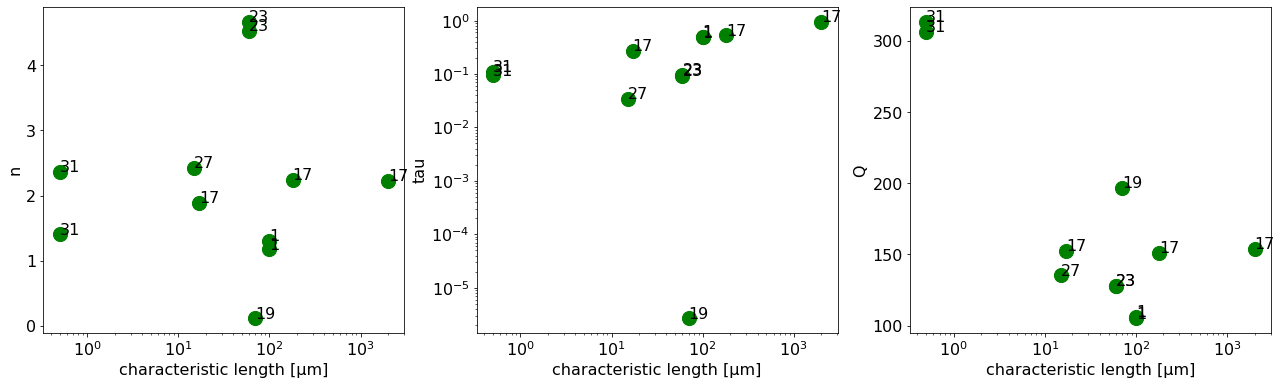

In [37]:
# Take either cathode or anode charateristic length
characteristic_length = []
char_cathode = par_df_full['Cathode 3D \nCharateristic Length [µm]'].values
char_anode = par_df_full['Anode 3D \nCharateristic\nLength [µm]'].values
for index,length in enumerate(char_cathode):
    if np.isnan(length)==False:
        characteristic_length.append(length)
    else: characteristic_length.append(char_anode[index])

matplotlib.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(22,6))
ax = fig.subplots(nrows=1,ncols=3)

ax[0].scatter(characteristic_length, n, color='g',s=200)
ax[0].set_xlabel('characteristic length [µm]')
ax[0].set_ylabel('n')
ax[0].semilogx()
for index, txt in enumerate(paper):
    ax[0].annotate(paper[index], (characteristic_length[index], n[index]))
    
ax[1].scatter(characteristic_length, tau, color='g',s=200)
ax[1].set_xlabel('characteristic length [µm]')
ax[1].set_ylabel('tau')
ax[1].loglog()
for index, txt in enumerate(paper):
    ax[1].annotate(paper[index], (characteristic_length[index], tau[index]))
    
ax[2].scatter(characteristic_length, Q, color='g',s=200)
ax[2].set_xlabel('characteristic length [µm]')
ax[2].set_ylabel('Q')
ax[2].semilogx()
for index, txt in enumerate(paper):
    ax[2].annotate(paper[index], (characteristic_length[index], Q[index]))        

#### Plot without log scale

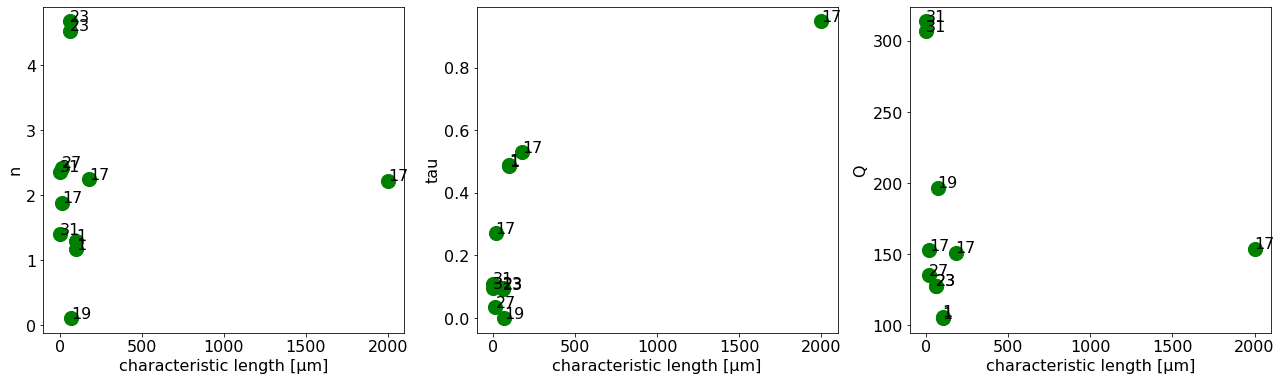

In [38]:
# Take either cathode or anode charateristic length
characteristic_length = []
char_cathode = par_df_full['Cathode 3D \nCharateristic Length [µm]'].values
char_anode = par_df_full['Anode 3D \nCharateristic\nLength [µm]'].values
for index,length in enumerate(char_cathode):
    if np.isnan(length)==False:
        characteristic_length.append(length)
    else: characteristic_length.append(char_anode[index])

matplotlib.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(22,6))
ax = fig.subplots(nrows=1,ncols=3)

ax[0].scatter(characteristic_length, n, color='g',s=200)
ax[0].set_xlabel('characteristic length [µm]')
ax[0].set_ylabel('n')

for index, txt in enumerate(paper):
    ax[0].annotate(paper[index], (characteristic_length[index], n[index]))
    
ax[1].scatter(characteristic_length, tau, color='g',s=200)
ax[1].set_xlabel('characteristic length [µm]')
ax[1].set_ylabel('tau')

for index, txt in enumerate(paper):
    ax[1].annotate(paper[index], (characteristic_length[index], tau[index]))
    
ax[2].scatter(characteristic_length, Q, color='g',s=200)
ax[2].set_xlabel('characteristic length [µm]')
ax[2].set_ylabel('Q')

for index, txt in enumerate(paper):
    ax[2].annotate(paper[index], (characteristic_length[index], Q[index]))        

### Figure 2(b) n vs tau, separated by material

"\nfor index, txt in enumerate(cathode_arc):\n    if txt != '1D':\n        ann = 'c:'+str(txt)\n        if str(anode_arc[index]) != '1D':\n            ann = 'c:'+str(txt)+'\n'+'a:'+str(anode_arc[index])\n    else: ann = 'a:'+str(anode_arc[index])\n    texts.append(plt.text(tau[index], n[index], ann))\n    #plt.annotate(ann, (tau[index], n[index]))\nadjust_text(texts)\n"

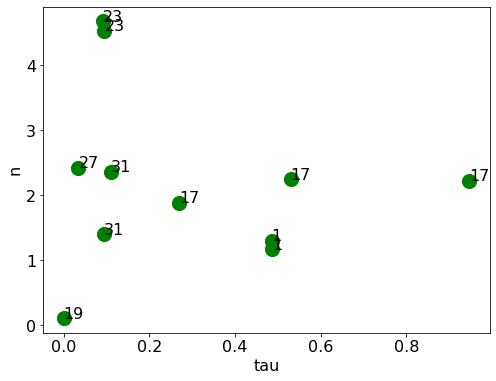

In [39]:
matplotlib.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(8,6))

plt.scatter(tau, n, color='g',s=200)
plt.xlabel('tau')
plt.ylabel('n')
#plt.semilogx()
texts = []
for index, txt in enumerate(paper):
    plt.annotate(paper[index], (tau[index], n[index]))     

# This code is used to adjust text annotations such that they don't overlap
'''
for index, txt in enumerate(cathode_arc):
    if txt != '1D':
        ann = 'c:'+str(txt)
        if str(anode_arc[index]) != '1D':
            ann = 'c:'+str(txt)+'\n'+'a:'+str(anode_arc[index])
    else: ann = 'a:'+str(anode_arc[index])
    texts.append(plt.text(tau[index], n[index], ann))
    #plt.annotate(ann, (tau[index], n[index]))
adjust_text(texts)
'''


### Plot Surface Area vs Fitting parameters

[]

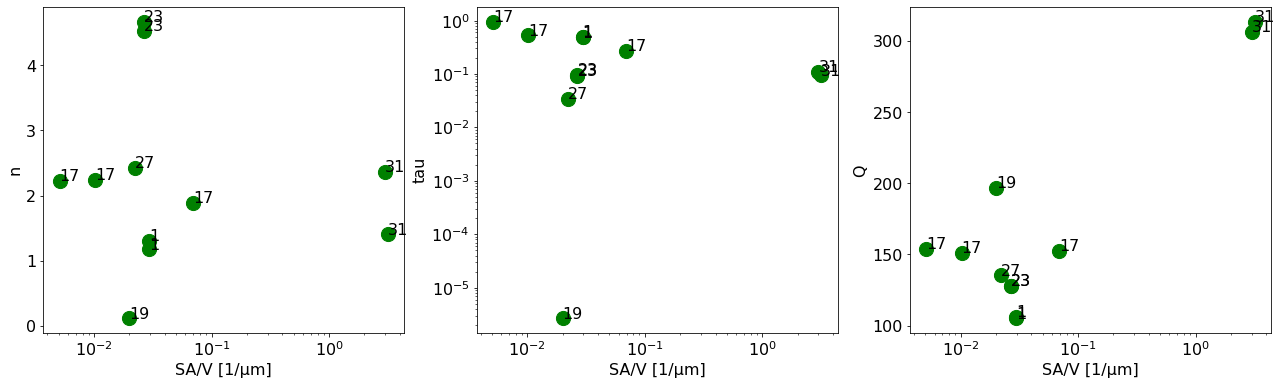

In [41]:
matplotlib.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(22,6))
ax = fig.subplots(nrows=1,ncols=3)

SA2V = par_df_full['SA/V [1/µm]'].values
SAgain = par_df_full['SA gain'].values


ax[0].scatter(SA2V, n, color='g',s=200)
ax[0].set_xlabel('SA/V [1/µm]')
ax[0].set_ylabel('n')
for index, txt in enumerate(paper):
    ax[0].annotate(paper[index], (SA2V[index], n[index]))
ax[0].semilogx()
    
ax[1].scatter(SA2V, tau, color='g',s=200)
ax[1].set_xlabel('SA/V [1/µm]')
ax[1].set_ylabel('tau')
for index, txt in enumerate(paper):
    ax[1].annotate(paper[index], (SA2V[index], tau[index]))
ax[1].loglog()
        
ax[2].scatter(SA2V, Q, color='g',s=200)
ax[2].set_xlabel('SA/V [1/µm]')
ax[2].set_ylabel('Q')
for index, txt in enumerate(paper):
    ax[2].annotate(paper[index], (SA2V[index], Q[index]))
ax[2].semilogx()

[]

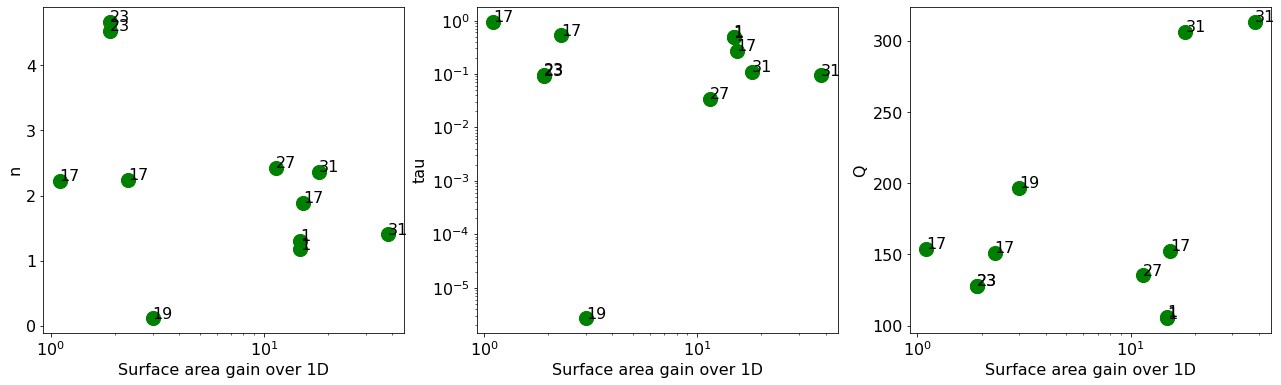

In [43]:
matplotlib.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(22,6))
ax = fig.subplots(nrows=1,ncols=3)


ax[0].scatter(SAgain, n, color='g',s=200)
ax[0].set_xlabel('Surface area gain over 1D')
ax[0].set_ylabel('n')
for index, txt in enumerate(paper):
    ax[0].annotate(paper[index], (SAgain[index], n[index]))
ax[0].semilogx()
    
ax[1].scatter(SAgain, tau, color='g',s=200)
ax[1].set_xlabel('Surface area gain over 1D')
ax[1].set_ylabel('tau')
for index, txt in enumerate(paper):
    ax[1].annotate(paper[index], (SAgain[index], tau[index]))
ax[1].loglog()
        
ax[2].scatter(SAgain, Q, color='g',s=200)
ax[2].set_xlabel('Surface area gain over 1D')
ax[2].set_ylabel('Q')
for index, txt in enumerate(paper):
    ax[2].annotate(paper[index], (SAgain[index], Q[index]))
ax[2].semilogx()